<a href="https://colab.research.google.com/github/Meghanareddy236/my-website/blob/main/aiml%20lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''week1a'''
graph={
    '5':['2','3'],
    '2':['4','8'],
    '3':['6'],
    '4':[],
    '8':['7'],
    '6':[],
    '7':[]

}
vis=[]
que=[]
def bfs(vis,graph,node):
  vis.append(node)
  que.append(node)
  while que:
    m=que.pop(0)
    print(m,end='\n')
    for neighbour in graph[m]:
      if neighbour not in vis:
        vis.append(neighbour)
        que.append(neighbour)
print("BFS Nodes are")
bfs(vis,graph,'5')

BFS Nodes are
5
2
3
4
8
6
7


In [ ]:
'''week1b'''
graph={
    '5':['2','3'],
    '2':['4','8'],
    '3':['6'],
    '4':[],
    '8':['7'],
    '6':[],
    '7':[]
}
vis=[]
stack=[]
def dfs(vis,graph,node):
  if node not in vis:
    vis.append(node)
    stack.append(node)
    n=stack.pop(0)
    print(n,end='\n')
    for neighbour in graph[n]:
      dfs(vis,graph,neighbour)
print("DFS Nodes are:")
dfs(vis,graph,'5')

DFS Nodes are:
5
2
4
8
7
3
6


In [ ]:
'''week2'''
def astaralgo(start_node,stop_node):

    open_set = set(start_node)
    closed_set= set()

    g={}
    parents = {}

    g[start_node] = 0

    parents[start_node]  = start_node

    while len(open_set) > 0:
        n=None

        for v in open_set:
            if n==None or g[v] + heuristic(v) < g[n] + heuristic(n):
                n=v
        if n==stop_node or Graph_nodes[n]==None:
                pass

        else:

            for(m,weight) in get_neighbors(n):
                if m not in open_set  and m not in closed_set:
                        open_set.add(m)
                        parents[m]=n
                        g[m] = g[n] + weight
                else:
                        if g[m] > g[n] +  weight:
                            g[m] = g[n] + weight
                            parents[m]=n

                            if m in closed_set:
                                closed_set.remove(m)
                                open_set.add(m)
        if n==None:
            print("path does not exist!")
            return None

        if n==stop_node:
            path=[]

            while parents[n]!=n:
                path.append(n)
                n=parents[n]

            path.append(start_node)

            path.reverse()

            print("Path found: {}".format(path))
            return path


        open_set.remove(n)
        closed_set.add(n)
    print("Path does not exist!")
    return None


def get_neighbors(v):
    if v in Graph_nodes:
        return Graph_nodes[v]

    else:
        return None

def heuristic(n):
    H_dist = {
        'A' : 11,
        'B' : 6,
        'C' : 99,
        'D' : 1,
        'E' : 7,
        'G' : 0,
    }
    return H_dist[n]


Graph_nodes = {
    'A' : [('B',2),('E',3)],
    'B' : [('C',1),('G',9)],
    'C' : None,
    'E' : [('D',6)],
    'D' : [('G',1)],
}
astaralgo('A','G')

Path found: ['A', 'E', 'D', 'G']


['A', 'E', 'D', 'G']

In [ ]:
'''week3a'''
from sys import maxsize
from itertools import permutations

# Number of vertices in the graph
V = 4

def travellingSalesmanProblem(graph, s):
    # Store all vertices except the source vertex
    vertex = []
    for i in range(V):
        if i != s:
            vertex.append(i)

    # Initialize minimum path weight to a very large value
    min_path = maxsize

    # Generate all permutations of the vertices
    next_permutation = permutations(vertex)
    for i in next_permutation:
        # Store the current path weight
        current_pathweight = 0

        # Compute the weight of the current permutation
        k = s
        for j in i:
            current_pathweight += graph[k][j]
            k = j
        current_pathweight += graph[k][s]

        # Update minimum path weight
        min_path = min(min_path, current_pathweight)

    return min_path

if __name__ == "__main__":
    # Adjacency matrix for the graph
    graph = [
        [0, 10, 15, 20],
        [10, 0, 35, 25],
        [15, 35, 0, 30],
        [20, 25, 30, 0]
    ]
    # Starting vertex
    s = 0
    print(travellingSalesmanProblem(graph, s))


80


In [ ]:
'''week3b'''
colors = ['red', 'blue', 'green']
states = ['a', 'b', 'c', 'd']

# Neighbours of each state
neighbors = {
    'a': ['b', 'c','d'],
    'b': ['a', 'd'],
    'c': ['a', 'd'],
    'd': ['a','b','c']
}

# Dictionary to store colors of states
colors_of_states = {}

# Function to check if a color is valid for a state
def promising(state, color):
    for neighbor in neighbors.get(state, []):  # Get neighbours of the state
        color_of_neighbor = colors_of_states.get(neighbor)  # Get neighbour's color
        if color_of_neighbor == color:  # Check if neighbour has the same color
            return False
    return True

# Function to get a valid color for a state
def get_color_for_state(state):
    for color in colors:  # Iterate over available colors
        if promising(state, color):  # Check if the color is valid
            return color
    return None  # No color found (shouldn't happen in this scenario)

# Main function
def main():
    for state in states:
        colors_of_states[state] = get_color_for_state(state)  # Assign color to state
    print(colors_of_states)  # Print the coloring result

# Run the main function
main()


{'a': 'red', 'b': 'blue', 'c': 'blue', 'd': 'green'}


In [ ]:
'''week8'''
import pandas as pd
from collections import Counter
import math
from pprint import pprint

# Entropy calculation
def entropy(probs):
    return sum(-prob * math.log(prob, 2) for prob in probs if prob > 0)

def entropy_of_list(a_list):
    cnt = Counter(a_list)  # Count frequency of elements
    num_instances = len(a_list)
    probs = [x / num_instances for x in cnt.values()]
    return entropy(probs)

# Information Gain calculation
def information_gain(df, split_attribute_name, target_attribute_name):
    df_split = df.groupby(split_attribute_name)  # Split data by attribute
    nobs = len(df.index)

    # Calculate weighted entropy
    df_agg_ent = df_split[target_attribute_name].agg(
        [entropy_of_list, lambda x: len(x) / nobs]
    )
    df_agg_ent.columns = ['entropy_of_list', 'proportion']
    avg_info = sum(df_agg_ent['entropy_of_list'] * df_agg_ent['proportion'])

    # Calculate total entropy
    old_entropy = entropy_of_list(df[target_attribute_name])
    return old_entropy - avg_info

# ID3 Algorithm for Decision Tree
def id3DT(df, target_attribute_name, attribute_names, default_class=None):
    cnt = Counter(df[target_attribute_name])  # Count target values
    if len(cnt) == 1:  # Only one class, return it
        return next(iter(cnt))
    elif df.empty or not attribute_names:  # No data or attributes left
        return default_class
    else:
        default_class = max(cnt, key=cnt.get)  # Majority class
        gainz = [
            information_gain(df, attr, target_attribute_name)
            for attr in attribute_names
        ]
        index_of_max = gainz.index(max(gainz))  # Attribute with max gain
        best_attr = attribute_names[index_of_max]
        tree = {best_attr: {}}

        remaining_attributes = [
            i for i in attribute_names if i != best_attr
        ]

        for attr_val, data_subset in df.groupby(best_attr):
            subtree = id3DT(
                data_subset, target_attribute_name, remaining_attributes, default_class
            )
            tree[best_attr][attr_val] = subtree

        return tree

# Classification using the decision tree
def classify(instance, tree, default=None):
    attribute = next(iter(tree))  # Root attribute
    if instance[attribute] in tree[attribute]:
        result = tree[attribute][instance[attribute]]
        if isinstance(result, dict):  # Continue recursively if subtree
            return classify(instance, result)
        else:
            return result
    else:
        return default

# Example Dataset
data = {
    'Outlook': ['sunny', 'sunny', 'overcast', 'rain', 'rain', 'rain', 'overcast', 'sunny', 'sunny', 'rain', 'sunny', 'overcast', 'overcast', 'rain'],
    'Temperature': ['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool', 'mild', 'cool', 'mild', 'mild', 'mild', 'hot', 'mild'],
    'Humidity': ['high', 'high', 'high', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'high'],
    'Wind': ['weak', 'strong', 'weak', 'weak', 'weak', 'strong', 'strong', 'weak', 'weak', 'weak', 'strong', 'strong', 'weak', 'strong'],
    'PlayTennis': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}
df = pd.DataFrame(data)

# Attribute names
attribute_names = list(df.columns)
attribute_names.remove('PlayTennis')

# Build the decision tree
tree = id3DT(df, 'PlayTennis', attribute_names)

print("The resultant decision tree is:")
pprint(tree)

# Classify new instances
new_data = {
    'Outlook': ['rain', 'sunny'],
    'Temperature': ['mild', 'hot'],
    'Humidity': ['normal', 'high'],
    'Wind': ['weak', 'strong']
}
df2 = pd.DataFrame(new_data)
df2['Predicted'] = df2.apply(classify, axis=1, args=(tree, 'No'))
print("\nNew data with predictions:")
print(df2)



The resultant decision tree is:
{'Outlook': {'overcast': 'yes',
             'rain': {'Wind': {'strong': 'no', 'weak': 'yes'}},
             'sunny': {'Humidity': {'high': 'no', 'normal': 'yes'}}}}

New data with predictions:
  Outlook Temperature Humidity    Wind Predicted
0    rain        mild   normal    weak       yes
1   sunny         hot     high  strong        no


In [ ]:
'''week6'''import numpy as np

class HMM:
    def __init__(self, states, obs):
        self.states = states
        self.n_states = len(states)
        self.n_obs = len(obs)
        self.state_index = {state: i for i, state in enumerate(states)}
        self.obs_index = {ob: i for i, ob in enumerate(obs)}

        # Transition probability matrix (A)
        self.A = np.array([
            [0.6, 0.3, 0.1],
            [0.2, 0.6, 0.3],
            [0.1, 0.4, 0.5]
        ])

        # Emission probability matrix (B)
        self.B = np.array([
            [0.8, 0.15, 0.05],
            [0.3, 0.4, 0.3],
            [0.1, 0.2, 0.7]
        ])

        # Initial probabilities (π)
        self.pi = np.array([0.5, 0.3, 0.2])

    def forward(self, obs_seq_indices):
        """
        Perform the forward algorithm to calculate the probability of an observation sequence.

        Parameters:
        obs_seq_indices (list[int]): A list of indices representing the observation sequence.

        Returns:
        float: The probability of the observation sequence.
        """
        n = len(obs_seq_indices)
        alpha = np.zeros((n, self.n_states))  # Initialize alpha matrix

        # Initialize alpha for the first observation
        alpha[0] = self.pi * self.B[:, obs_seq_indices[0]]

        # Recursion step: compute alpha for subsequent observations
        for t in range(1, n):
            for j in range(self.n_states):
                alpha[t, j] = np.sum(alpha[t - 1] * self.A[:, j]) * self.B[j, obs_seq_indices[t]]

        # Return the total probability of the observation sequence
        return np.sum(alpha[-1])

# States and observations
states = ['sunny', 'rainy', 'cloudy']
obs = ['umbrella', 'normal', 'raincoat']

# Create the HMM
hmm = HMM(states, obs)

# Observation sequence
obs_seq = ['umbrella', 'normal', 'umbrella', 'raincoat']

# Convert observation sequence to indices
obs_seq_indices = [hmm.obs_index[o] for o in obs_seq]

# Calculate the probability of the observation sequence
prob = hmm.forward(obs_seq_indices)

# Print the result
print(f"The probability of observing the sequence {obs_seq} is {prob:.4f}")


The probability of observing the sequence ['umbrella', 'normal', 'umbrella', 'raincoat'] is 0.0150


In [2]:
'''week4'''
from sympy import symbols, Or, Not, Implies, satisfiable
Rain = symbols('Rain')
Harry_Visited_Hagrid = symbols('Harry_Visited_Hagrid')
Harry_Visited_Dumbledore = symbols('Harry_Visited_Dumbledore')
sentence_1 = Implies((Rain), Harry_Visited_Hagrid)
sentence_2 = (Or(Harry_Visited_Hagrid, Harry_Visited_Dumbledore)
& Not(Harry_Visited_Hagrid & Harry_Visited_Dumbledore))
sentence_3 = Harry_Visited_Dumbledore
knowledge_base = sentence_1 & sentence_2 & sentence_3
solution = satisfiable(knowledge_base, all_models=True)
for model in solution:
 if model[Rain]:
  print("It rained today.")
 else:
  print("There is no rain today.")

There is no rain today.


In [14]:
'''week4'''
from sympy import symbols, Or, And, Not, Implies

# Define symbols
rained = symbols('rained')
visited_Hagrid = symbols('visited_Hagrid')
visited_Dumbledore = symbols('visited_Dumbledore')

# Define the statements
s1 = Implies(Not(rained), visited_Hagrid)  # ~rained -> visited_Hagrid
s2 = Or(visited_Hagrid, visited_Dumbledore) & Not(And(visited_Hagrid, visited_Dumbledore))  # XOR logic
s3 = visited_Dumbledore  # Harry visited Dumbledore

# Combined formula
cf = And(s1, s2, s3)

# Function to check combined consistency
def check_combined_consistency():
    possible_values = [True, False]
    consistent_scenarios = []

    for rained_value in possible_values:
        for visited_hagrid_value in possible_values:
            # Substitution dictionary
            result = {
                rained: rained_value,
                visited_Hagrid: visited_hagrid_value,
                visited_Dumbledore: True  # s3 is always True
            }

            # Evaluate individual statements
            es1 = s1.subs(result)
            es2 = s2.subs(result)
            es3 = s3.subs(result)
            ecf = cf.subs(result)  # Evaluate combined formula

            # Print results
            print(f"rained={rained_value}, visited_Hagrid={visited_hagrid_value}, visited_Dumbledore=True")
            print(f"statement1 (~R -> H) evaluates to: {es1}")
            print(f"statement2 (H ⨁ D) evaluates to: {es2}")
            print(f"combined formula evaluates to: {ecf}")

            # Check consistency
            if ecf:
                consistent_scenarios.append((rained_value, visited_hagrid_value))

    return consistent_scenarios

# Run the function
consistent_scenarios = check_combined_consistency()

# Display results
print("\nConsistent scenarios based on the combined formula:")
if consistent_scenarios:
    for scenario in consistent_scenarios:
        rained_value, visited_hagrid_value = scenario
        print(f"rained={rained_value}, visited_Hagrid={visited_hagrid_value}")
else:
    print("No consistent scenarios found.")

# Display combined logic formula
print("\nCombined logic formula:")
print(cf)


rained=True, visited_Hagrid=True, visited_Dumbledore=True
statement1 (~R -> H) evaluates to: True
statement2 (H ⨁ D) evaluates to: False
combined formula evaluates to: False
rained=True, visited_Hagrid=False, visited_Dumbledore=True
statement1 (~R -> H) evaluates to: True
statement2 (H ⨁ D) evaluates to: True
combined formula evaluates to: True
rained=False, visited_Hagrid=True, visited_Dumbledore=True
statement1 (~R -> H) evaluates to: True
statement2 (H ⨁ D) evaluates to: False
combined formula evaluates to: False
rained=False, visited_Hagrid=False, visited_Dumbledore=True
statement1 (~R -> H) evaluates to: False
statement2 (H ⨁ D) evaluates to: True
combined formula evaluates to: False

Consistent scenarios based on the combined formula:
rained=True, visited_Hagrid=False

Combined logic formula:
visited_Dumbledore & (visited_Dumbledore | visited_Hagrid) & (Implies(~rained, visited_Hagrid)) & ~(visited_Dumbledore & visited_Hagrid)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


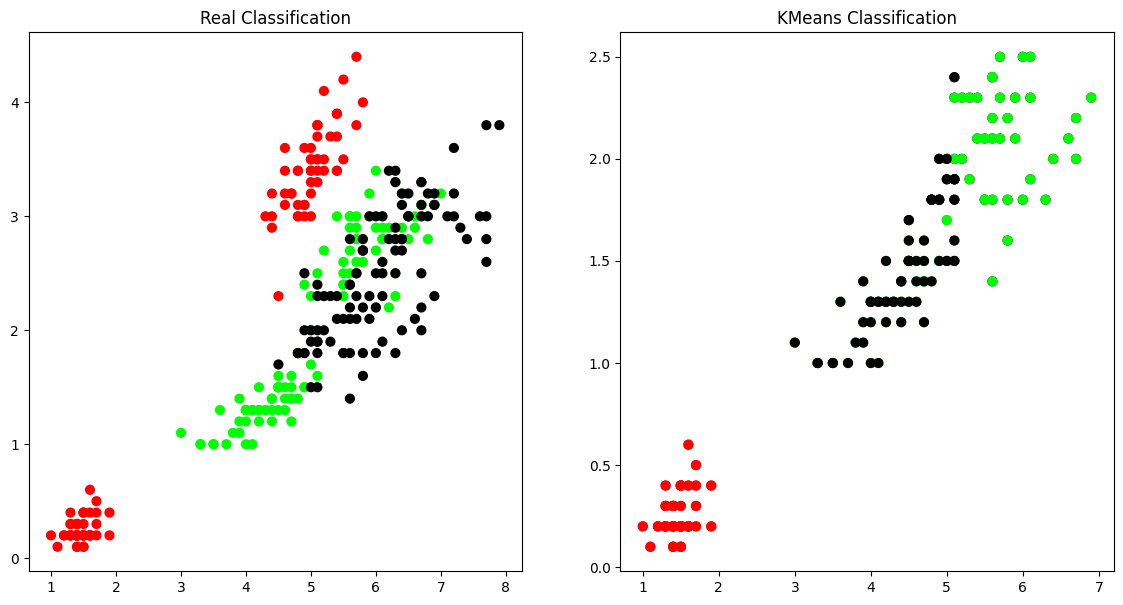

In [4]:
'''Week9'''
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np

# Load Iris dataset
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']  # Correctly set column names
X
y = pd.DataFrame(iris.target)
y.columns = ['target']
y
# Plot the Sepal and Petal scatter plots
plt.figure(figsize=(14, 7))
colormap = np.array(['red', 'lime', 'black'])

# Plot Sepal (Sepal_Length vs Sepal_Width)
plt.subplot(1, 2, 1)
plt.scatter(X.Sepal_Length, X.Sepal_Width, c=colormap[y.target], s=40)
plt.title('Sepal')

# Plot Petal (Petal_Length vs Petal_Width)
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.target], s=40)
plt.title('Petal')

# Apply KMeans clustering
model = KMeans(n_clusters=3)
model.fit(X)

# Print cluster labels
print(model.labels_)

# Real Classification plot (actual labels from the dataset)
plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.target], s=40)
plt.title('Real Classification')

# KMeans Classification plot (predicted labels from KMeans)
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('KMeans Classification')

# Show plots
plt.show()

In [5]:
'''week10'''
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

iris = load_iris()
print("Dataset keys:", iris.keys())
df = pd.DataFrame(iris['data'], columns =iris['feature_names'])
print("Feature Data:\n", df.head())
print("Target names:", iris['target_names'])
print("Feature names:", iris['feature_names'])
print("Target array:\n", iris['target'])
X = df
Y = iris['target']
X_train, X_test, y_train , y_test= train_test_split(X,Y ,test_size = 0.33, random_state = 42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
print("length",len(X_test))
y_pred = knn.predict(X_test)
cm_test = confusion_matrix(y_test,y_pred)
print("Confusion Matrix(Test Data):\n", cm_test)
accuracy_test = accuracy_score(y_test,y_pred)
print("Correct prediction on test data:",accuracy_test)
print("Wrong prediction on test data:",1-accuracy_test)
print("length",len(X_train))
y_train_pred = knn.predict(X_train)
cm_train = confusion_matrix(y_train,y_train_pred)
print("Confusion Matrix (Training Data):\n",cm_train)


Dataset keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Feature Data:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Target names: ['setosa' 'versicolor' 'virginica']
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target array:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 

In [7]:
'''week11'''
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

input_layer_neurons = 2
hidden_layer_neurons = 4
output_layer_neurons = 1
epochs = 10000
learning_rate = 0.1

np.random.seed(42)

wh = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
bh = np.random.uniform(size=(1, hidden_layer_neurons))

wout = np.random.uniform(size=(hidden_layer_neurons, output_layer_neurons))
bout = np.random.uniform(size=(1, output_layer_neurons))

for epoch in range(epochs):
    hidden_layer_input = np.dot(X, wh) + bh
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, wout) + bout
    output = sigmoid(output_layer_input)

    error = y - output

    output_layer_gradient = sigmoid_derivative(output)
    d_output = error * output_layer_gradient

    hidden_layer_gradient = sigmoid_derivative(hidden_layer_output)
    d_hidden_layer = d_output.dot(wout.T) * hidden_layer_gradient

    wout += hidden_layer_output.T.dot(d_output) * learning_rate
    bout += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    wh += X.T.dot(d_hidden_layer) * learning_rate
    bh += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Error: {np.mean(np.abs(error))}")

print("Final Predictions after training:")
print(output)


Epoch 0, Error: 0.49914791405546904
Epoch 1000, Error: 0.4989908274224632
Epoch 2000, Error: 0.49392112204426847
Epoch 3000, Error: 0.46086324847622695
Epoch 4000, Error: 0.37081148754970494
Epoch 5000, Error: 0.2293685934150816
Epoch 6000, Error: 0.1411700792664044
Epoch 7000, Error: 0.10187019467760619
Epoch 8000, Error: 0.08085064924133495
Epoch 9000, Error: 0.06790718296112089
Final Predictions after training:
[[0.04690963]
 [0.95663392]
 [0.92548675]
 [0.07177571]]


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         4
         1.0       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

xx= [[0.   0.01 0.02 ... 5.47 5.48 5.49]
 [0.   0.01 0.02 ... 5.47 5.48 5.49]
 [0.   0.01 0.02 ... 5.47 5.48 5.49]
 ...
 [0.   0.01 0.02 ... 5.47 5.48 5.49]
 [0.   0.01 0.02 ... 5.47 5.48 5.49]
 [0.   0.01 0.02 ... 5.47 5.48 5.49]]
yy= [[-0.5  -0.5  -0.5  ... -0.5  -0.5  -0.5 ]
 [-0.49 -0.49 -0.49 ... -0.49 -0.49 -0.49]
 [-0.48 -0.48 -0.48 ... -0.48 -0.48 -0.48]
 ...
 [ 3.47  3.47  3.47 ...  3.47  3.47  3.47]
 [ 3.48  3.48  3.48 ...  3.48  3.48  3.48]
 [ 3.49  3.49  3.49 ...  3.49  3.49  3.49]]
Z= [[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 

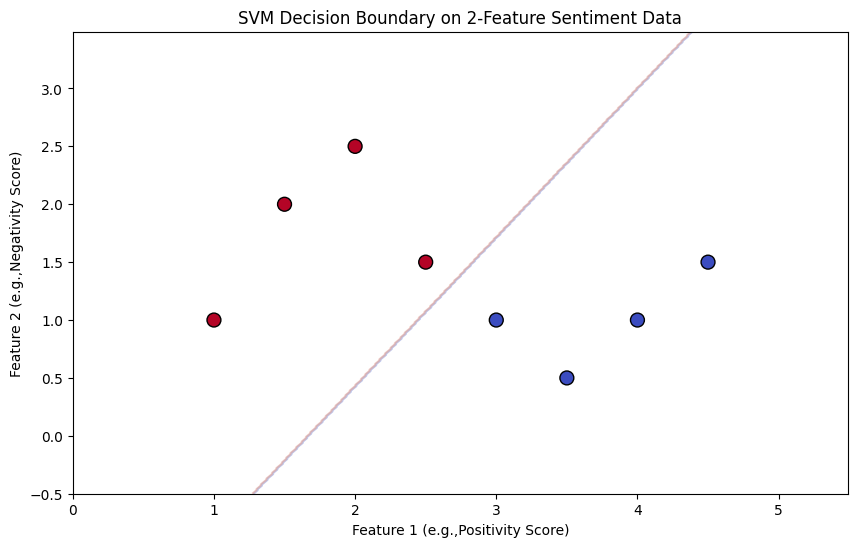

In [6]:
'''week12'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score
data=np.array([

    [1.5,2.0,1],
    [1.0,1.0,1],
    [2.0,2.5,1],
    [2.5,1.5,1],
    [3.0,1.0,0],
    [3.5,0.5,0],
    [4.0,1.0,0],
    [4.5,1.5,0]

])

X=data[:,:2]
y=data[:,2]

svm_model=SVC(kernel='linear')
svm_model.fit(X,y)

y_pred=svm_model.predict(X)
print("Accuracy:",accuracy_score(y,y_pred))
print("\nClassification Report:\n",classification_report(y,y_pred))
x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.01),
                  np.arange(y_min,y_max,0.01))
print("xx=",xx)
print("yy=",yy)

Z=svm_model.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
print("Z=",Z)

plt.figure(figsize=(10,6))
plt.contour(xx,yy,Z,alpha=0.2,cmap='coolwarm')
plt.scatter(X[:,0],X[:,1],c=y,cmap='coolwarm',edgecolor='k',s=100)
plt.xlabel("Feature 1 (e.g.,Positivity Score)")
plt.ylabel("Feature 2 (e.g.,Negativity Score)")
plt.title("SVM Decision Boundary on 2-Feature Sentiment Data")
plt.show();



In [11]:
'''week5'''
# Define probabilities
p_burglary = 0.002
p_earthquake = 0.001
p_alarm_burglary_and_earthquake = 0.94
p_alarm_burglary_and_no_earthquake = 0.95
p_alarm_no_burglary_and_earthquake = 0.31
p_alarm_no_burglary_and_no_earthquake = 0.001

p_david_calls_alarm = 0.91
p_david_doesnot_call_alarm = 0.09
p_david_calls_no_alarm = 0.05
p_david_doesnot_call_no_alarm = 0.95

p_sophia_calls_alarm = 0.75
p_sophia_doesnot_call_alarm = 0.25
p_sophia_calls_no_alarm = 0.02
p_sophia_doesnot_call_no_alarm = 0.98

# Define the joint probability function
def joint_prob(alarm, burglary, earthquake, david_calls, sophia_calls):
    if alarm:
        if burglary and earthquake:
            p_alarm = p_alarm_burglary_and_earthquake
        elif burglary and not earthquake:
            p_alarm = p_alarm_burglary_and_no_earthquake
        elif not burglary and earthquake:
            p_alarm = p_alarm_no_burglary_and_earthquake
        else:
            p_alarm = p_alarm_no_burglary_and_no_earthquake
    else:
        if burglary and earthquake:
            p_alarm = 1 - p_alarm_burglary_and_earthquake
        elif burglary and not earthquake:
            p_alarm = 1 - p_alarm_burglary_and_no_earthquake
        elif not burglary and earthquake:
            p_alarm = 1 - p_alarm_no_burglary_and_earthquake
        else:
            p_alarm = 1 - p_alarm_no_burglary_and_no_earthquake

    p_david = (p_david_calls_alarm if david_calls else p_david_doesnot_call_alarm) if alarm else (p_david_calls_no_alarm if david_calls else p_david_doesnot_call_no_alarm)
    p_sophia = (p_sophia_calls_alarm if sophia_calls else p_sophia_doesnot_call_alarm) if alarm else (p_sophia_calls_no_alarm if sophia_calls else p_sophia_doesnot_call_no_alarm)

    return p_alarm * (p_burglary if burglary else 1 - p_burglary) * (p_earthquake if earthquake else 1 - p_earthquake) * p_david * p_sophia

# Calculate the result
result = joint_prob(
    alarm=True,
    burglary=False,
    earthquake=False,
    david_calls=True,
    sophia_calls=True
)
print(f"The alarm has sounded, neither burglary nor earthquake occurred, and David and Sophia called: {result:.8f}")


The alarm has sounded, neither burglary nor earthquake occurred, and David and Sophia called: 0.00068045
